# Libraries

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd   # for importing dataset.
import shutil         # for saving the files.
import numpy as np    # for feature 1
import spacy          # for feature 3
from textblob import TextBlob # for feature 12
import nltk           # for feature 16
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize 
!pip install pyspellchecker # for feature 19
from spellchecker import SpellChecker  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing Dataset


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Ott/Ott.csv")
liwc_dictionary = pd.read_csv("/content/drive/MyDrive/Project/LIWC_dictionary.csv")
print(dataset.head(5))
print("\n----\n")
print(liwc_dictionary.head(5))

      label                                        review_text
0  truthful  We stayed for a one night getaway with family ...
1  truthful  Triple A rate with upgrade to view room was le...
2  truthful  This comes a little late as I'm finally catchi...
3  truthful  The Omni Chicago really delivers on all fronts...
4  truthful  I asked for a high floor away from the elevato...

----

  perceptual_processes        time     space personal_pronoun  \
0                acid*     abrupt*     above              hed   
1               acrid*       after    across             he'd   
2               aroma*  afterlife*       air              her   
3              audibl*  aftermath*    among*             hers   
4               audio*  afternoon*  anywhere          herself   

  first_person_singular first_person_plural third_person_singular  \
0                     i                lets                    he   
1                    Id               let's                   hed   
2                

# Descriptive Statistics of dataset

In [ ]:
fake_review_count = 0
real_review_count = 0
fake_review_word_count_sum = 0
real_review_word_count_sum = 0

for i in range(len(dataset)):

  if dataset.loc[i,"label"] == 'truthful': # fake review

    fake_review_count += 1 

    fake_review_word_count_sum += len(str(dataset.loc[i,"review_text"]).split())

  else: # real review

    real_review_count += 1 

    real_review_word_count_sum += len(str(dataset.loc[i,"review_text"]).split())

print(f"Total Number of Reviews: {fake_review_count + real_review_count}")
print(f"Number of Real Reviews: {real_review_count}")
print(f"Number of Fake Reviews: {fake_review_count}")
print(f"Percentage of fake reviews: {'{:.2f}'.format(fake_review_count / (fake_review_count + real_review_count) * 100)}%")

print(f"\nMean length of a fake review: {'{:.3f}'.format(fake_review_word_count_sum / fake_review_count)}")
print(f"Mean length of a real review: {'{:.3f}'.format(real_review_word_count_sum / real_review_count)}")


Total Number of Reviews: 1600
Number of Real Reviews: 800
Number of Fake Reviews: 800
Percentage of fake reviews: 50.00%

Mean length of a fake review: 150.914
Mean length of a real review: 146.636


# Preprocessing: Changing Labels


In [ ]:
# Changing the labels from Y-N to 1-0.
fake_review_count = 0
real_review_count = 0

for i in range(len(dataset)):
  if dataset.loc[i,"label"] == 'truthful':   # real review
    dataset.loc[i,"label"] = 0     
    real_review_count += 1
  else:   
    dataset.loc[i,"label"] = 1
    fake_review_count += 1

print(f"Fake review Count = {fake_review_count}")
print(f"Real review Count = {real_review_count}")
print(f"Total review Count = {real_review_count + fake_review_count}")
print("\n\n")

print(dataset.head(5))

Fake review Count = 800
Real review Count = 800
Total review Count = 1600



  label                                        review_text
0     0  We stayed for a one night getaway with family ...
1     0  Triple A rate with upgrade to view room was le...
2     0  This comes a little late as I'm finally catchi...
3     0  The Omni Chicago really delivers on all fronts...
4     0  I asked for a high floor away from the elevato...


# Preprocessing: Lower Case

In [ ]:
# LIWC requires the words to be in lowercase.
dataset["lower_case_review_text"] = dataset["review_text"].str.lower()
print(dataset.head(5))

  label                                        review_text  \
0     0  We stayed for a one night getaway with family ...   
1     0  Triple A rate with upgrade to view room was le...   
2     0  This comes a little late as I'm finally catchi...   
3     0  The Omni Chicago really delivers on all fronts...   
4     0  I asked for a high floor away from the elevato...   

                              lower_case_review_text  
0  we stayed for a one night getaway with family ...  
1  triple a rate with upgrade to view room was le...  
2  this comes a little late as i'm finally catchi...  
3  the omni chicago really delivers on all fronts...  
4  i asked for a high floor away from the elevato...  


# Preprocessing: Punctuation Removal

In [ ]:
# The only allowed puntucation for LIWC is \'
punctuations = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~'  
dataset["lower_case_review_text"] = dataset[
    "lower_case_review_text"].str.replace("[{}]".format(punctuations), "", regex = True)
print(dataset.head(5))

  label                                        review_text  \
0     0  We stayed for a one night getaway with family ...   
1     0  Triple A rate with upgrade to view room was le...   
2     0  This comes a little late as I'm finally catchi...   
3     0  The Omni Chicago really delivers on all fronts...   
4     0  I asked for a high floor away from the elevato...   

                              lower_case_review_text  
0  we stayed for a one night getaway with family ...  
1  triple a rate with upgrade to view room was le...  
2  this comes a little late as i'm finally catchi...  
3  the omni chicago really delivers on all fronts...  
4  i asked for a high floor away from the elevato...  


# Preprocessing: Cardinality & Word Count

In [ ]:
# The mathematical representation given in paper are all set operations.
# Word count is the most used attribute, hence having it cached.

for i in range(len(dataset)): 
  words = set(str(dataset.loc[i,"lower_case_review_text"]).split())
  dataset.loc[i,"lower_case_review_text"] = ' '.join(words) # cardinality 
  dataset.loc[i,"review_text_word_count"] = len(words)      # word count

print(dataset.head(5))

  label                                        review_text  \
0     0  We stayed for a one night getaway with family ...   
1     0  Triple A rate with upgrade to view room was le...   
2     0  This comes a little late as I'm finally catchi...   
3     0  The Omni Chicago really delivers on all fronts...   
4     0  I asked for a high floor away from the elevato...   

                              lower_case_review_text  review_text_word_count  
0  44in restaurant getaway complete slow2hours br...                    78.0  
1  upgrade bed than triple had great very restaur...                    38.0  
2  up bit than high great transportation car part...                   135.0  
3  dining minutes high weights great staff fitnes...                    85.0  
4  when lot center working high district great wh...                    55.0  


# Saving Processed dataset

In [ ]:
dataset.to_csv("processed_dataset.csv", index = False, encoding = "utf-8")
shutil.copy("processed_dataset.csv", "/content/drive/MyDrive/Ott")

'/content/drive/MyDrive/Ott/processed_dataset.csv'

# Loading Files

In [ ]:
processed_dataset = pd.read_csv("/content/drive/MyDrive/Ott/processed_dataset.csv")
features_extraction = pd.read_csv("/content/drive/MyDrive/Ott/features.csv")

print(processed_dataset.head(5))
print("\n----\n")
print(features_extraction.head(5))

   label                                        review_text  \
0      0  We stayed for a one night getaway with family ...   
1      0  Triple A rate with upgrade to view room was le...   
2      0  This comes a little late as I'm finally catchi...   
3      0  The Omni Chicago really delivers on all fronts...   
4      0  I asked for a high floor away from the elevato...   

                              lower_case_review_text  review_text_word_count  
0  44in restaurant getaway complete slow2hours br...                    78.0  
1  upgrade bed than triple had great very restaur...                    38.0  
2  up bit than high great transportation car part...                   135.0  
3  dining minutes high weights great staff fitnes...                    85.0  
4  when lot center working high district great wh...                    55.0  

----

   f01_generalization_terms_usage
0                               0
1                               0
2                               0
3   

# LIWC function

In [ ]:
def get_LIWC_dictionary_words(categories):
  """
  Input:-   Categories - a list of categories, whose words are needed.
  Output:-  actual - a set of exact words
            regex - a list of regular expressions without trailing '*'
  Algorithm:- 

  actual = set()
  regex = []

  For each row in LIWC_Dictionary
    For each category in LIWC_Dictionary
      word = LIWC_Dictionary[row][category] 
      if word is regular expression:
        regex.append(word)
      else
        actual.add(word)
  
  return actual, regex
  """
  liwc_dictionary = pd.read_csv("/content/drive/MyDrive/Project/LIWC_dictionary.csv")

  actual = set()
  regex = []

  for i in range(len(liwc_dictionary)):
    for category in categories:
      word = str(liwc_dictionary.loc[i, category])  #str() for detecting "nan"
      if word != "nan":
        if word[-1] == "*":
          regex.append(word[:-1])
        else:
          actual.add(word)
          
  return actual, regex

# Feature 1: Generalization Terms Usage

In [ ]:
# List of nineteen absolutist words provided by M. Al-Mosaiwi et al.[196]
# storing the words in a set, which offers O(1) access time.

generalization_terms = {'absolutely', 'all', 'always', 'complete', 
                        'completely', 'constant',  'constantly', 'definitely', 
                        'entire', 'ever', 'every', 'everyone', 'everything', 
                        'full', 'must', 'never', 'nothing', 'totally', 'whole'}

for i in range(len(processed_dataset)):
  count = 0
  words = str(processed_dataset.loc[i,"lower_case_review_text"]).split()
  for word in words: 
    if word in generalization_terms:
      count += 1
    
  if processed_dataset.loc[i,"review_text_word_count"] == 0:
    features_extraction.loc[i,'f01_generalization_terms_usage'] = 0
  else:
    features_extraction.loc[i,'f01_generalization_terms_usage'] = count / processed_dataset.loc[i,'review_text_word_count']

print(features_extraction.head(5))

   f01_generalization_terms_usage
0                        0.012821
1                        0.000000
2                        0.007407
3                        0.023529
4                        0.036364


# Feature 2: Richness of detials

In [ ]:
categories = ["time", "space", "perceptual_processes"]
actual, regex = get_LIWC_dictionary_words(categories)

for i in range(len(processed_dataset)):
  count = 0
  words = str(processed_dataset.loc[i,"lower_case_review_text"]).split()
  for word in words: 
    if word in actual:
      count += 1
    else:
      for re in regex:
        if word[:len(re)] == re:
          count += 1
          break

  if processed_dataset.loc[i,"review_text_word_count"] == 0:
    features_extraction.loc[i,'f02_richness_of_details'] = 0
  else:
    features_extraction.loc[i,'f02_richness_of_details'] = count / processed_dataset.loc[i,'review_text_word_count']


print(features_extraction.head(5))

   f01_generalization_terms_usage  f02_richness_of_details
0                        0.012821                 0.115385
1                        0.000000                 0.157895
2                        0.007407                 0.222222
3                        0.023529                 0.211765
4                        0.036364                 0.163636


# Feature 3: Richness of verifiable details

In [ ]:
NER = spacy.load("en_core_web_sm") 

categories = ["time", "space", "perceptual_processes"]
actual, regex = get_LIWC_dictionary_words(categories)

for i in range(len(processed_dataset)):

  unverifiable_count = 0
  words = str(processed_dataset.loc[i,"lower_case_review_text"]).split()
  for word in words: 
    if word in actual:
      unverifiable_count += 1
    else:
      for re in regex:
        if word[:len(re)] == re:
          unverifiable_count += 1
          break

  verifiable_count = 0  
  text = NER(processed_dataset.loc[i,"review_text"])

  verifiable_count = len(text.ents)

  if verifiable_count != 0 and unverifiable_count != 0:
    result = verifiable_count / (unverifiable_count + verifiable_count)
  elif unverifiable_count == 0 and verifiable_count != 0:
    result = 1
  else:
    result = 0

print(features_extraction.head(5))

   f01_generalization_terms_usage  f02_richness_of_details
0                        0.012821                 0.115385
1                        0.000000                 0.157895
2                        0.007407                 0.222222
3                        0.023529                 0.211765
4                        0.036364                 0.163636


# Feature 4: Length of the review

In [ ]:
features_extraction["f04_length_of_the_review"] = processed_dataset['review_text_word_count']
print(features_extraction.head(5))

   f01_generalization_terms_usage  f02_richness_of_details  \
0                        0.012821                 0.115385   
1                        0.000000                 0.157895   
2                        0.007407                 0.222222   
3                        0.023529                 0.211765   
4                        0.036364                 0.163636   

   f04_length_of_the_review  
0                      78.0  
1                      38.0  
2                     135.0  
3                      85.0  
4                      55.0  


# Feature 5,6,7: Pronouns Usage

In [ ]:
categories = ["personal_pronoun"]
PP_actual, PP_regex = get_LIWC_dictionary_words(categories)

categories = ["first_person_singular"]
FS_actual, FS_regex = get_LIWC_dictionary_words(categories)

categories = ["first_person_plural"]
FP_actual, FP_regex = get_LIWC_dictionary_words(categories)

categories = ["third_person_singular", "third_person_plural"]
TP_actual, TP_regex = get_LIWC_dictionary_words(categories)

for i in range(len(processed_dataset)):
  PP_count = 0
  FS_count = 0
  FP_count = 0
  TP_count = 0

  words = str(processed_dataset.loc[i,"lower_case_review_text"]).split()
  for word in words: 

    if word in PP_actual:
      PP_count += 1
    else:
      for re in PP_regex:
        if word[:len(re)] == re:
          PP_count += 1
          break

    if word in FS_actual:
      FS_count += 1
    else:
      for re in FS_regex:
        if word[:len(re)] == re:
          FS_count += 1
          break

    if word in FP_actual:
      FP_count += 1
    else:
      for re in FP_regex:
        if word[:len(re)] == re:
          FP_count += 1
          break
    
    if word in TP_actual:
      TP_count += 1
    else:
      for re in TP_regex:
        if word[:len(re)] == re:
          TP_count += 1
          break

  if PP_count == 0: # since PP is the denominator
    features_extraction.loc[i,"f05_first_person_singular_pronouns_usage"] = 0
    features_extraction.loc[i,"f06_first_person_plural_pronouns_usage"] = 0
    features_extraction.loc[i,"f07_third_person_pronouns_usage"] = 0
    continue
  
  if FS_count == 0:
    features_extraction.loc[i,"f05_first_person_singular_pronouns_usage"] = 0
  else:
    features_extraction.loc[i,"f05_first_person_singular_pronouns_usage"] = FS_count / PP_count
      
  if FP_count == 0:
    features_extraction.loc[i,"f06_first_person_plural_pronouns_usage"] = 0
  else:
    features_extraction.loc[i,"f06_first_person_plural_pronouns_usage"] = FP_count / PP_count

  if TP_count == 0:
    features_extraction.loc[i,"f07_third_person_pronouns_usage"] = 0
  else:
    features_extraction.loc[i,"f07_third_person_pronouns_usage"] = TP_count / PP_count

print(features_extraction.head(5))

   f01_generalization_terms_usage  f02_richness_of_details  \
0                        0.012821                 0.115385   
1                        0.000000                 0.157895   
2                        0.007407                 0.222222   
3                        0.023529                 0.211765   
4                        0.036364                 0.163636   

   f04_length_of_the_review  f05_first_person_singular_pronouns_usage  \
0                      78.0                                      0.25   
1                      38.0                                      0.00   
2                     135.0                                      0.40   
3                      85.0                                      0.75   
4                      55.0                                      0.50   

   f06_first_person_plural_pronouns_usage  f07_third_person_pronouns_usage  
0                                     0.5                              0.0  
1                                 

# Feature 8,9: Verbs Usage

In [ ]:
nlp = spacy.load("en_core_web_sm") # spacy model for detecting English words

for i in range(len(processed_dataset)):

  verbs_count = 0
  present_verbs_count = 0
  past_verbs_count = 0

  text = processed_dataset.loc[i,"review_text"]
  
  doc = nlp(text)

  for token in doc:
    if token.pos_ == "VERB":
      verbs_count += 1
      if token.tag_ == "VBZ" or token.tag_ == "VBP" or token.tag_ =="VBG":
        present_verbs_count += 1
      elif token.tag_ == "VBD":
        past_verbs_count += 1

  if verbs_count != 0:
    features_extraction.loc[i,"f08_present_tense_verbs_usage"] = present_verbs_count / verbs_count
    features_extraction.loc[i,"f09_past_tense_verbs_usage"] = past_verbs_count / verbs_count
  else:
    features_extraction.loc[i,"f08_present_tense_verbs_usage"] = 0
    features_extraction.loc[i,"f09_past_tense_verbs_usage"] = 0
  
print(features_extraction.head(5))

   f01_generalization_terms_usage  f02_richness_of_details  \
0                        0.012821                 0.115385   
1                        0.000000                 0.157895   
2                        0.007407                 0.222222   
3                        0.023529                 0.211765   
4                        0.036364                 0.163636   

   f04_length_of_the_review  f05_first_person_singular_pronouns_usage  \
0                      78.0                                      0.25   
1                      38.0                                      0.00   
2                     135.0                                      0.40   
3                      85.0                                      0.75   
4                      55.0                                      0.50   

   f06_first_person_plural_pronouns_usage  f07_third_person_pronouns_usage  \
0                                     0.5                              0.0   
1                               

# Feature 10: Passive Voice

In [ ]:
nlp = spacy.load("en_core_web_sm")

def is_passive(sentence):
    doc = nlp(sentence)
    for token in doc:
        if token.dep_ == "nsubjpass" or token.dep_ == "auxpass" or token.dep_ == "csubjpass":       
            return True
    return False

for i in range(len(processed_dataset)):
  text = processed_dataset.loc[i,"review_text"]
  doc = nlp(text)

  sentence_count = 0
  passive_voice_count = 0

  for sentence in doc.sents:
      if is_passive(str(sentence)):
          passive_voice_count += 1
      sentence_count += 1
  features_extraction.loc[i,"f10_passive_voice_usage"] = passive_voice_count / sentence_count
  
print(features_extraction.head(5))

   f01_generalization_terms_usage  f02_richness_of_details  \
0                        0.012821                 0.115385   
1                        0.000000                 0.157895   
2                        0.007407                 0.222222   
3                        0.023529                 0.211765   
4                        0.036364                 0.163636   

   f04_length_of_the_review  f05_first_person_singular_pronouns_usage  \
0                      78.0                                      0.25   
1                      38.0                                      0.00   
2                     135.0                                      0.40   
3                      85.0                                      0.75   
4                      55.0                                      0.50   

   f06_first_person_plural_pronouns_usage  f07_third_person_pronouns_usage  \
0                                     0.5                              0.0   
1                               

# Feature 11: Negations Usage

In [ ]:
categories = ["negations"]
actual, regex = get_LIWC_dictionary_words(categories)

for i in range(len(processed_dataset)):
  count = 0
  words = str(processed_dataset.loc[i,"lower_case_review_text"]).split()
  for word in words: 
    if word in actual:
      count += 1
    else:
      for re in regex:
        if word[:len(re)] == re:
          count += 1
          break

  if processed_dataset.loc[i,"review_text_word_count"] == 0:
    features_extraction.loc[i,'f11_negations_usage'] = 0
  else:
    features_extraction.loc[i,'f11_negations_usage'] = count / processed_dataset.loc[i,'review_text_word_count']

print(features_extraction.head(5))

   f01_generalization_terms_usage  f02_richness_of_details  \
0                        0.012821                 0.115385   
1                        0.000000                 0.157895   
2                        0.007407                 0.222222   
3                        0.023529                 0.211765   
4                        0.036364                 0.163636   

   f04_length_of_the_review  f05_first_person_singular_pronouns_usage  \
0                      78.0                                      0.25   
1                      38.0                                      0.00   
2                     135.0                                      0.40   
3                      85.0                                      0.75   
4                      55.0                                      0.50   

   f06_first_person_plural_pronouns_usage  f07_third_person_pronouns_usage  \
0                                     0.5                              0.0   
1                               

# Feature 12: Sentiment Polarity

In [ ]:
features_extraction["f12_sentiment_polarity"] = processed_dataset["review_text"].apply(lambda row: TextBlob(row).sentiment.polarity)
print(features_extraction.head(5))

   f01_generalization_terms_usage  f02_richness_of_details  \
0                        0.012821                 0.115385   
1                        0.000000                 0.157895   
2                        0.007407                 0.222222   
3                        0.023529                 0.211765   
4                        0.036364                 0.163636   

   f04_length_of_the_review  f05_first_person_singular_pronouns_usage  \
0                      78.0                                      0.25   
1                      38.0                                      0.00   
2                     135.0                                      0.40   
3                      85.0                                      0.75   
4                      55.0                                      0.50   

   f06_first_person_plural_pronouns_usage  f07_third_person_pronouns_usage  \
0                                     0.5                              0.0   
1                               

# Feature 13: Sentiment Subjectivity

In [ ]:
features_extraction["f13_sentiment_subjectivity"] = processed_dataset["review_text"].apply(lambda row: TextBlob(row).sentiment.subjectivity)
print(features_extraction.head(5))

   f01_generalization_terms_usage  f02_richness_of_details  \
0                        0.012821                 0.115385   
1                        0.000000                 0.157895   
2                        0.007407                 0.222222   
3                        0.023529                 0.211765   
4                        0.036364                 0.163636   

   f04_length_of_the_review  f05_first_person_singular_pronouns_usage  \
0                      78.0                                      0.25   
1                      38.0                                      0.00   
2                     135.0                                      0.40   
3                      85.0                                      0.75   
4                      55.0                                      0.50   

   f06_first_person_plural_pronouns_usage  f07_third_person_pronouns_usage  \
0                                     0.5                              0.0   
1                               

# Feature 14,15: Emotion Words Usage

In [ ]:
categories = ["affective_processes"]
AF_actual, AF_regex = get_LIWC_dictionary_words(categories)

categories = ["positive_emotions"]
PE_actual, PE_regex = get_LIWC_dictionary_words(categories)

categories = ["negative_emotions"]
NE_actual, NE_regex = get_LIWC_dictionary_words(categories)

for i in range(len(processed_dataset)):
  AF_count = 0
  PE_count = 0
  NE_count = 0

  words = str(processed_dataset.loc[i,"lower_case_review_text"]).split()
  for word in words: 

    if word in AF_actual:
      AF_count += 1
    else:
      for re in AF_regex:
        if word[:len(re)] == re:
          AF_count += 1
          break

    if word in PE_actual:
      PE_count += 1
    else:
      for re in PE_regex:
        if word[:len(re)] == re:
          PE_count += 1
          break

    if word in NE_actual:
      NE_count += 1
    else:
      for re in NE_regex:
        if word[:len(re)] == re:
          NE_count += 1
          break
  
  if AF_count == 0:
    features_extraction.loc[i,"f14_positive_emotion_words_usage"] = 0
    features_extraction.loc[i,"f15_negative_emotion_words_usage"] = 0
    continue

  if PE_count == 0:
    features_extraction.loc[i,"f14_positive_emotion_words_usage"] = 0
  else:
    features_extraction.loc[i,"f14_positive_emotion_words_usage"] = PE_count / AF_count

  if NE_count == 0:
    features_extraction.loc[i,"f15_negative_emotion_words_usage"] = 0
  else:
    features_extraction.loc[i,"f15_negative_emotion_words_usage"] = NE_count / AF_count

print(features_extraction.head(5))

   f01_generalization_terms_usage  f02_richness_of_details  \
0                        0.012821                 0.115385   
1                        0.000000                 0.157895   
2                        0.007407                 0.222222   
3                        0.023529                 0.211765   
4                        0.036364                 0.163636   

   f04_length_of_the_review  f05_first_person_singular_pronouns_usage  \
0                      78.0                                      0.25   
1                      38.0                                      0.00   
2                     135.0                                      0.40   
3                      85.0                                      0.75   
4                      55.0                                      0.50   

   f06_first_person_plural_pronouns_usage  f07_third_person_pronouns_usage  \
0                                     0.5                              0.0   
1                               

# Feature 16: Location of maximum affect

In [ ]:
"""
Algorithm

(a) tokenize each text at the sentence level,
(b) score each sentence using the LIWC category ‘‘affective processes’’ to calculate the emotion ratio, 
(c) determine the sentence number with the maximum score of affect, and
(d) divide the sentence number by the number of sentences in the text.
  
for review in joined_date:
  sentences = sent_tokenize(review)

  max_index = 0
  max_count = 0 

  for i,sentence in sentences:
    count = 0
    words = sentence.split()
    for word in words:
      if word in affective processes
        count += 1

    if count >= max_count
      max_index = i
      max_count = count
  
  f["f16_location_of_maximum_affect"] = max_index / len(sentences)
"""

actual, regex = get_LIWC_dictionary_words(["affective_processes"])

for i in range(len(processed_dataset)): 

  sentences = sent_tokenize(str(processed_dataset.loc[i,"review_text"]))

  max_ratio_index = 0
  max_ratio = 0 

  j = 0
  for sentence in sentences:        

    count = 0 # to count number of affective words

    words = word_tokenize(sentence) # word tokenisation
    for word in words:
      if word in actual:
        count += 1
      else:
        for reg in regex:
          if word[:len(reg)] == reg:
            count += 1
            break

    ratio = count / len(words)

    if ratio >= max_ratio:
      max_ratio_index = j
      max_ratio = ratio

    j += 1

  features_extraction.loc[i,"f16_location_of_maximum_affect"] = (max_ratio_index / len(sentences)) if len(sentences) != 0 else 0


print(features_extraction.head(5))

   f01_generalization_terms_usage  f02_richness_of_details  \
0                        0.012821                 0.115385   
1                        0.000000                 0.157895   
2                        0.007407                 0.222222   
3                        0.023529                 0.211765   
4                        0.036364                 0.163636   

   f04_length_of_the_review  f05_first_person_singular_pronouns_usage  \
0                      78.0                                      0.25   
1                      38.0                                      0.00   
2                     135.0                                      0.40   
3                      85.0                                      0.75   
4                      55.0                                      0.50   

   f06_first_person_plural_pronouns_usage  f07_third_person_pronouns_usage  \
0                                     0.5                              0.0   
1                               

# Feature 17,18: Uncertainty Features

In [ ]:
categories = ["certainty"]
CR_actual, CR_regex = get_LIWC_dictionary_words(categories)

categories = ["tentative"]
UC_actual, UC_regex = get_LIWC_dictionary_words(categories)

for i in range(len(processed_dataset)):
  CR_count = 0
  UC_count = 0

  words = str(processed_dataset.loc[i,"lower_case_review_text"]).split()
  for word in words: 

    if word in CR_actual:
      CR_count += 1
    else:
      for re in CR_regex:
        if word[:len(re)] == re:
          CR_count += 1
          break

    if word in UC_actual:
      UC_count += 1
    else:
      for re in UC_regex:
        if word[:len(re)] == re:
          UC_count += 1
          break

  word_count = processed_dataset.loc[i,"review_text_word_count"]
  if word_count == 0:
    features_extraction.loc[i,"f17_certainty_words_usage"] = 0
    features_extraction.loc[i,"f18_uncertainty_words_usage"] = 0
    continue

  if CR_count == 0:
    features_extraction.loc[i,"f17_certainty_words_usage"] = 0
  else:
    features_extraction.loc[i,"f17_certainty_words_usage"] = CR_count / word_count

  if UC_count == 0:
    features_extraction.loc[i,"f18_uncertainty_words_usage"] = 0
  else:
    features_extraction.loc[i,"f18_uncertainty_words_usage"] = UC_count / word_count

print(features_extraction.head(5))

   f01_generalization_terms_usage  f02_richness_of_details  \
0                        0.012821                 0.115385   
1                        0.000000                 0.157895   
2                        0.007407                 0.222222   
3                        0.023529                 0.211765   
4                        0.036364                 0.163636   

   f04_length_of_the_review  f05_first_person_singular_pronouns_usage  \
0                      78.0                                      0.25   
1                      38.0                                      0.00   
2                     135.0                                      0.40   
3                      85.0                                      0.75   
4                      55.0                                      0.50   

   f06_first_person_plural_pronouns_usage  f07_third_person_pronouns_usage  \
0                                     0.5                              0.0   
1                               

# Feature 19: Misspelled Words Ratio

In [ ]:
spell = SpellChecker()
features_extraction["f19_misspelled_words_ratio"] = processed_dataset["lower_case_review_text"].apply(lambda row: len(spell.unknown(str(row).split())))
features_extraction["f19_misspelled_words_ratio"] = features_extraction["f19_misspelled_words_ratio"].div(processed_dataset["review_text_word_count"])
print(features_extraction.head(5))

   f01_generalization_terms_usage  f02_richness_of_details  \
0                        0.012821                 0.115385   
1                        0.000000                 0.157895   
2                        0.007407                 0.222222   
3                        0.023529                 0.211765   
4                        0.036364                 0.163636   

   f04_length_of_the_review  f05_first_person_singular_pronouns_usage  \
0                      78.0                                      0.25   
1                      38.0                                      0.00   
2                     135.0                                      0.40   
3                      85.0                                      0.75   
4                      55.0                                      0.50   

   f06_first_person_plural_pronouns_usage  f07_third_person_pronouns_usage  \
0                                     0.5                              0.0   
1                               

In [ ]:
features_extraction.to_csv("features.csv", index = False, encoding = "utf-8")
shutil.copy("features.csv", "/content/drive/MyDrive/Ott")

'/content/drive/MyDrive/Ott/features.csv'

# Libraries for Models

In [5]:
import pandas as pd   # for importing features

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt      # for plotting confusion matrix
import seaborn as sns   # templates for confusion matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

# Loading Files

In [6]:
features = pd.read_csv("/content/drive/MyDrive/Ott/features.csv")
processed_data = pd.read_csv("/content/drive/MyDrive/Ott/processed_dataset.csv")

# Model Preparation

In [7]:
X = features
y = processed_data['label']

In [8]:
y.value_counts()

0    800
1    800
Name: label, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 3, stratify = y)
print(f"X_train.shape = {X_train.shape}\ny_train.shape = {y_train.shape}")
print(f"\nX_test.shape = {X_test.shape}\ny_test.shape = {y_test.shape}")

X_train.shape = (1440, 18)
y_train.shape = (1440,)

X_test.shape = (160, 18)
y_test.shape = (160,)


In [10]:
# What stratify does is it makes splits of equal frequency.
print(f"Traing +ve/-ve split: \n{y_train.value_counts()}")
print()
print(f"Testing +ve/-ve split: \n{y_test.value_counts()}")

Traing +ve/-ve split: 
1    720
0    720
Name: label, dtype: int64

Testing +ve/-ve split: 
1    80
0    80
Name: label, dtype: int64


# Confusion Matrix

In [11]:
def print_confusion_matrix(y_test, y_prediction):
  cm = confusion_matrix(y_test, y_prediction)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()
  print()

In [12]:
def print_roc_curve(y_test, y_prediction):
  fpr, tpr, thresholds = roc_curve(y_test, y_prediction)
  plt.figure(figsize=(5,5))
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()
  print()

# Logistic Regression

              precision    recall  f1-score   support

           0       0.60      0.62      0.61        80
           1       0.61      0.57      0.59        80

    accuracy                           0.60       160
   macro avg       0.60      0.60      0.60       160
weighted avg       0.60      0.60      0.60       160



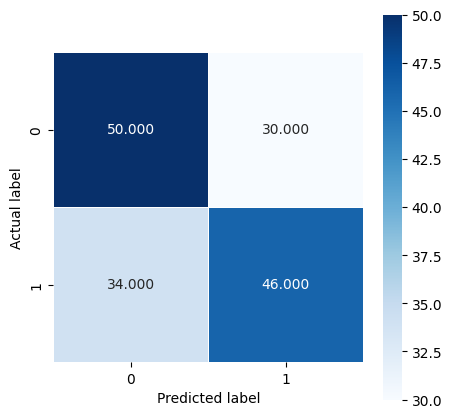

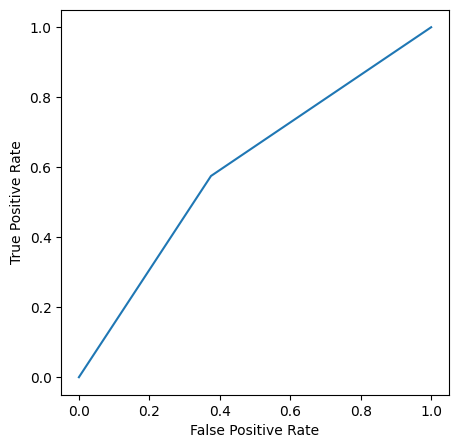

In [13]:
logistic_regression = LogisticRegression(random_state = 0, max_iter = 10000)
logistic_regression = logistic_regression.fit(X_train, y_train)
y_prediction = logistic_regression.predict(X_test)

print(classification_report(y_test, y_prediction))
print_confusion_matrix(y_test, y_prediction)
print_roc_curve(y_test, y_prediction)

# Naive Bayes

              precision    recall  f1-score   support

           0       0.56      0.55      0.56        80
           1       0.56      0.57      0.57        80

    accuracy                           0.56       160
   macro avg       0.56      0.56      0.56       160
weighted avg       0.56      0.56      0.56       160



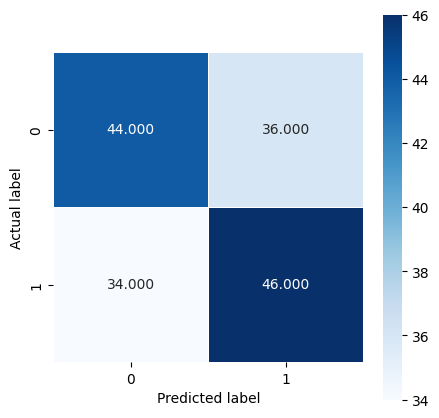

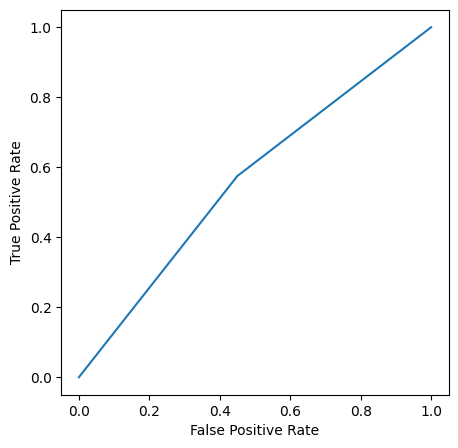

In [14]:
naive_bayes = GaussianNB()
naive_bayes = naive_bayes.fit(X_train, y_train)
y_prediction = naive_bayes.predict(X_test)

print(classification_report(y_test, y_prediction))
print_confusion_matrix(y_test, y_prediction)
print_roc_curve(y_test, y_prediction)

# Decision Tree

              precision    recall  f1-score   support

           0       0.59      0.55      0.57        80
           1       0.58      0.62      0.60        80

    accuracy                           0.59       160
   macro avg       0.59      0.59      0.59       160
weighted avg       0.59      0.59      0.59       160



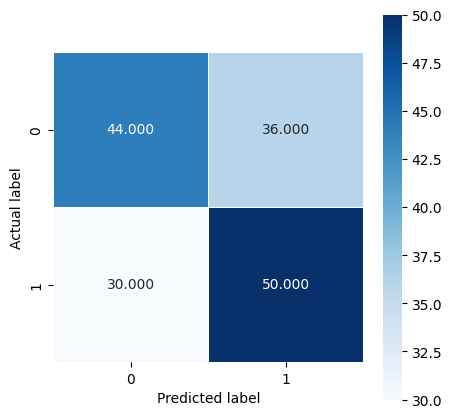

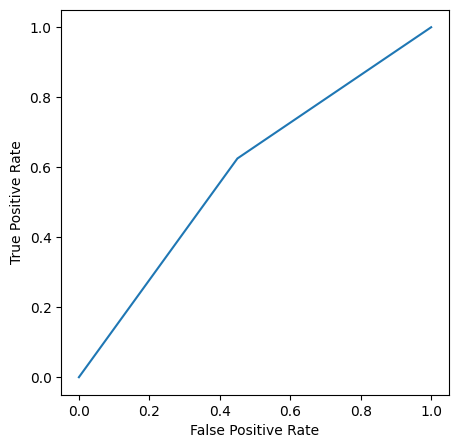

In [15]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)
y_prediction = decision_tree.predict(X_test)

print(classification_report(y_test, y_prediction))
print_confusion_matrix(y_test, y_prediction)
print_roc_curve(y_test, y_prediction)

# Random Forest

              precision    recall  f1-score   support

           0       0.57      0.65      0.61        80
           1       0.59      0.51      0.55        80

    accuracy                           0.58       160
   macro avg       0.58      0.58      0.58       160
weighted avg       0.58      0.58      0.58       160



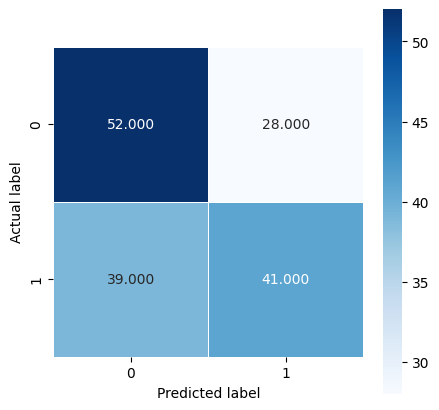

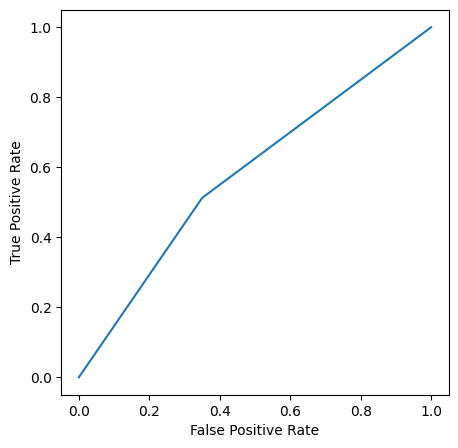

In [16]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest = random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)

print(classification_report(y_test, y_prediction))
print_confusion_matrix(y_test, y_prediction)
print_roc_curve(y_test, y_prediction)

# XGBoost

              precision    recall  f1-score   support

           0       0.67      0.61      0.64        80
           1       0.64      0.70      0.67        80

    accuracy                           0.66       160
   macro avg       0.66      0.66      0.66       160
weighted avg       0.66      0.66      0.66       160



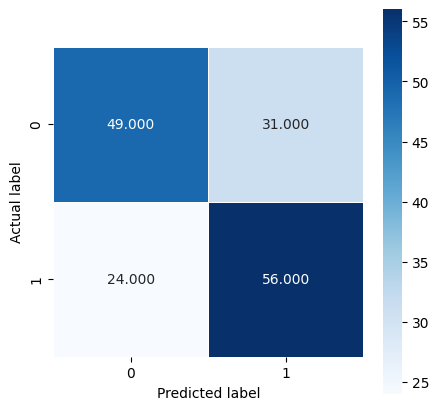

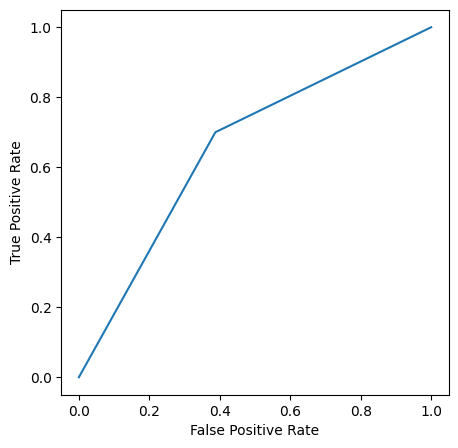

In [17]:
gradient_boost = GradientBoostingClassifier(n_estimators = 100, 
                                            learning_rate = 1.0,
                                            max_depth = 1, 
                                            random_state=0)
gradient_boost = gradient_boost.fit(X_train, y_train)
y_prediction = gradient_boost.predict(X_test)

print(classification_report(y_test, y_prediction))
print_confusion_matrix(y_test, y_prediction)
print_roc_curve(y_test, y_prediction)

# Neural Network

              precision    recall  f1-score   support

           0       0.54      0.65      0.59        80
           1       0.56      0.45      0.50        80

    accuracy                           0.55       160
   macro avg       0.55      0.55      0.55       160
weighted avg       0.55      0.55      0.55       160



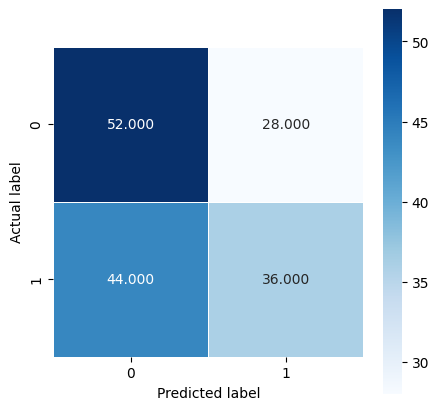

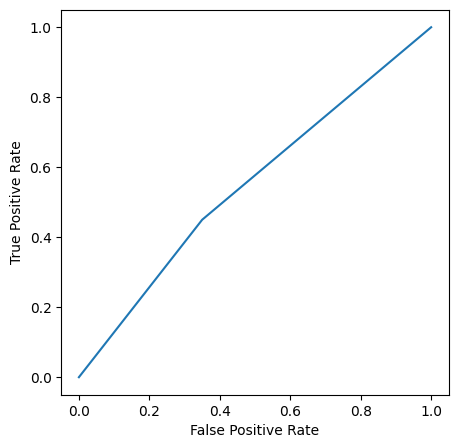

In [18]:
neural_network = MLPClassifier(hidden_layer_sizes=(100,50),max_iter=1000)
neural_network.fit(X_train,y_train)
y_prediction = neural_network.predict(X_test)

print(classification_report(y_test, y_prediction))
print_confusion_matrix(y_test, y_prediction)
print_roc_curve(y_test, y_prediction)